<a href="https://colab.research.google.com/github/Swastiikiisermms22/Swastik/blob/main/data%20sci%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import zipfile
import os

# Create the target directory if it doesn't exist
target_dir = '/content/images'
if not os.path.exists(target_dir):
    os.makedirs(target_dir)

# Extract files from the zip and move them to the correct directory
with zipfile.ZipFile('/content/images.zip', 'r') as z_img:
    # Loop through each file in the zip archive
    for file_info in z_img.infolist():
        # Check if it's a file and not a directory
        if not file_info.is_dir():
            # Get the file name (strip the leading 'images/' from the path)
            filename = file_info.filename.replace('images/', '')
            target_path = os.path.join(target_dir, filename)

            # Extract and move the file
            with z_img.open(file_info.filename) as source, open(target_path, 'wb') as target:
                target.write(source.read())

# Verify the extraction now
print("Number of images in /content/images directory:", len(os.listdir('/content/images')))


Number of images in /content/images directory: 1585


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import os
import zipfile

# Step 1: Unzip Files
# Adjust these file names if they differ from your actual file names in Colab
with zipfile.ZipFile('/content/sample_submission.csv.zip', 'r') as z_samp:
    z_samp.extractall('/content/')

with zipfile.ZipFile('/content/train.csv.zip', 'r') as z_train:
    z_train.extractall('/content/')

with zipfile.ZipFile('/content/images.zip', 'r') as z_img:
    z_img.extractall('/content/images/')

with zipfile.ZipFile('/content/test.csv.zip', 'r') as z_test:
    z_test.extractall('/content/')


In [18]:
# Step 2: Verify Contents (Optional)
print("Files in /content directory:", os.listdir('/content'))
print("Number of images in /content/images directory:", len(os.listdir('/content/images')))


Files in /content directory: ['.config', 'images', 'test.csv.zip', 'sample_submission.csv.zip', 'test.csv', 'train.csv.zip', 'sample_submission.csv', 'train.csv', 'images.zip', 'sample_data']
Number of images in /content/images directory: 1585


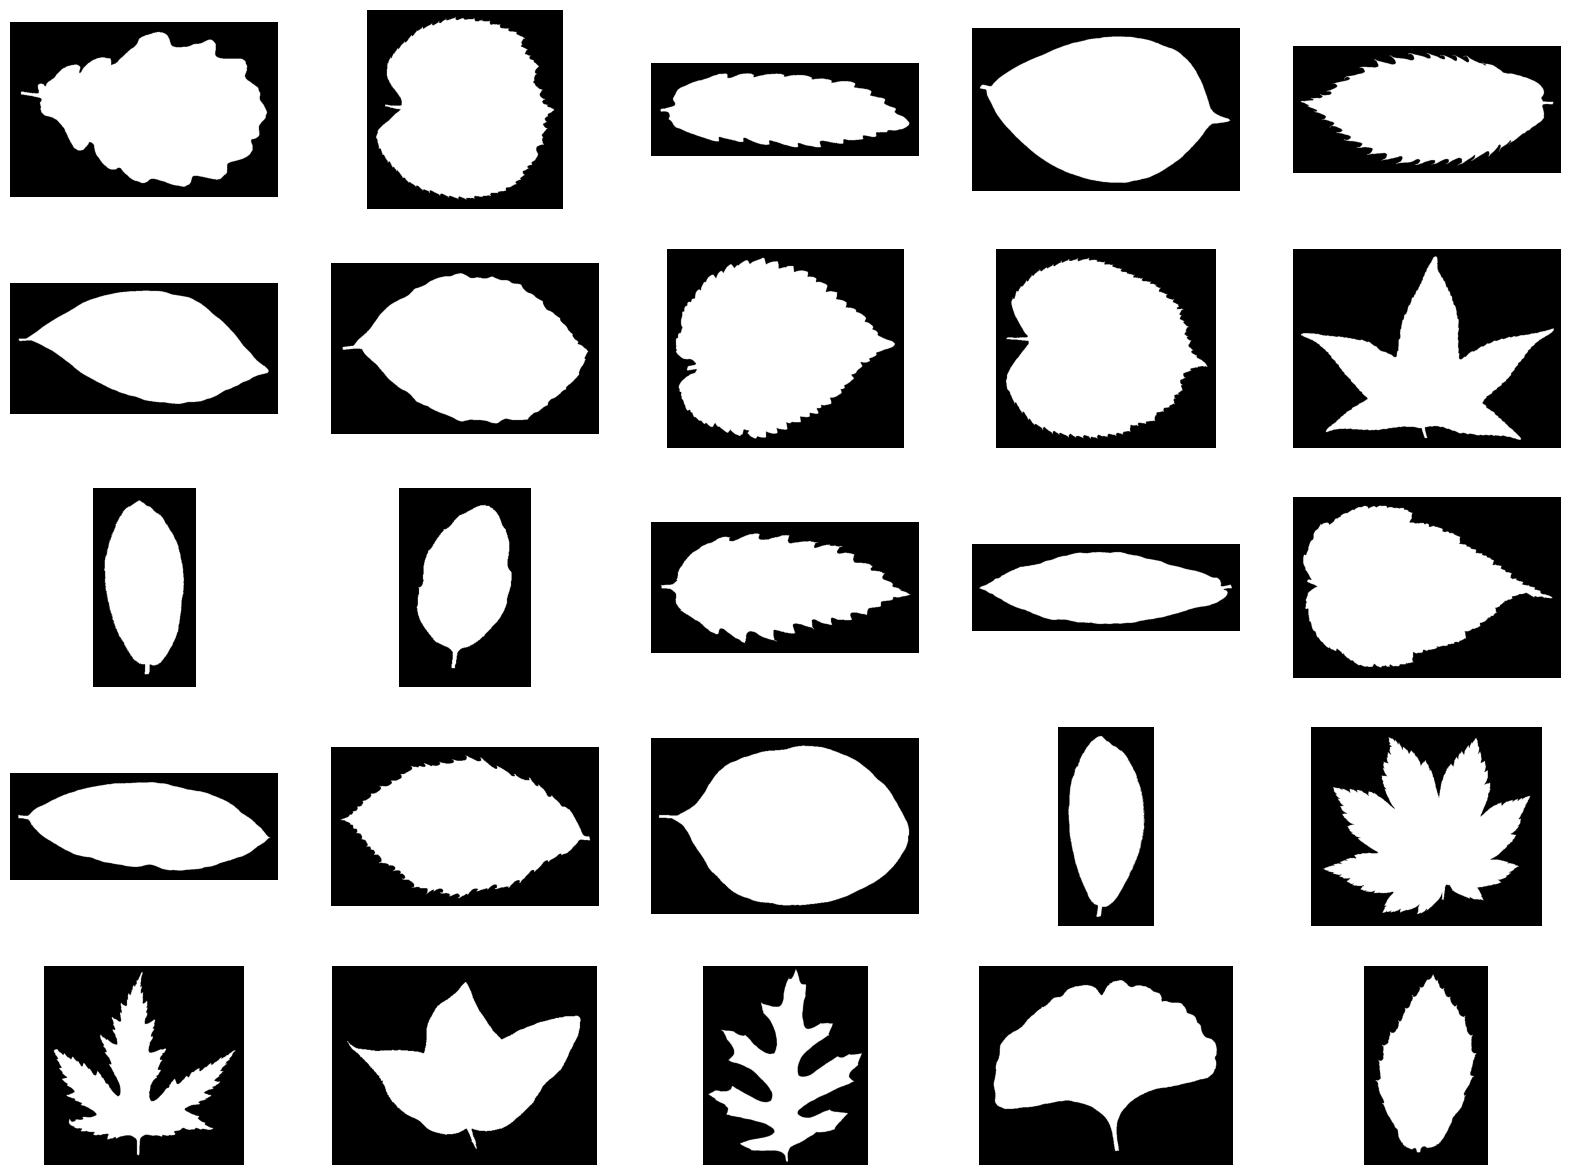

In [19]:
# Step 3: Display Random Images from Extracted Images Directory
plt.figure(figsize=(20,15))
for i in range(25):
    img_name = np.random.choice(os.listdir('/content/images'))
    img_path = os.path.join('/content/images', img_name)
    plt.subplot(5, 5, i + 1)
    img = load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
plt.show()

In [20]:
# Step 4: Load Data
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [21]:
# Step 5: Data Exploration (Optional)
print("Train Data Head:\n", train_data.head())
print("Null values in Train Data:", train_data.isnull().any().sum())
print("Train Data Info:\n", train_data.info())
print("Number of unique species:", train_data['species'].nunique())


Train Data Head:
    id                species   margin1   margin2   margin3   margin4  \
0   1            Acer_Opalus  0.007812  0.023438  0.023438  0.003906   
1   2  Pterocarya_Stenoptera  0.005859  0.000000  0.031250  0.015625   
2   3   Quercus_Hartwissiana  0.005859  0.009766  0.019531  0.007812   
3   5        Tilia_Tomentosa  0.000000  0.003906  0.023438  0.005859   
4   6     Quercus_Variabilis  0.005859  0.003906  0.048828  0.009766   

    margin5   margin6   margin7  margin8  ...  texture55  texture56  \
0  0.011719  0.009766  0.027344      0.0  ...   0.007812   0.000000   
1  0.025391  0.001953  0.019531      0.0  ...   0.000977   0.000000   
2  0.003906  0.005859  0.068359      0.0  ...   0.154300   0.000000   
3  0.021484  0.019531  0.023438      0.0  ...   0.000000   0.000977   
4  0.013672  0.015625  0.005859      0.0  ...   0.096680   0.000000   

   texture57  texture58  texture59  texture60  texture61  texture62  \
0   0.002930   0.002930   0.035156        0.0      

In [23]:
# Step 6: Prepare Labels and Features
x = train_data.drop(['species'], axis=1)
y = train_data['species']
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Drop irrelevant columns from train data
x = x.drop(['id'], axis=1)
test_id = test_data['id']
test_data = test_data.drop(['id'], axis=1)

# View classes
classes = list(encoder.classes_)
print("Classes:", classes)


Classes: ['Acer_Capillipes', 'Acer_Circinatum', 'Acer_Mono', 'Acer_Opalus', 'Acer_Palmatum', 'Acer_Pictum', 'Acer_Platanoids', 'Acer_Rubrum', 'Acer_Rufinerve', 'Acer_Saccharinum', 'Alnus_Cordata', 'Alnus_Maximowiczii', 'Alnus_Rubra', 'Alnus_Sieboldiana', 'Alnus_Viridis', 'Arundinaria_Simonii', 'Betula_Austrosinensis', 'Betula_Pendula', 'Callicarpa_Bodinieri', 'Castanea_Sativa', 'Celtis_Koraiensis', 'Cercis_Siliquastrum', 'Cornus_Chinensis', 'Cornus_Controversa', 'Cornus_Macrophylla', 'Cotinus_Coggygria', 'Crataegus_Monogyna', 'Cytisus_Battandieri', 'Eucalyptus_Glaucescens', 'Eucalyptus_Neglecta', 'Eucalyptus_Urnigera', 'Fagus_Sylvatica', 'Ginkgo_Biloba', 'Ilex_Aquifolium', 'Ilex_Cornuta', 'Liquidambar_Styraciflua', 'Liriodendron_Tulipifera', 'Lithocarpus_Cleistocarpus', 'Lithocarpus_Edulis', 'Magnolia_Heptapeta', 'Magnolia_Salicifolia', 'Morus_Nigra', 'Olea_Europaea', 'Phildelphus', 'Populus_Adenopoda', 'Populus_Grandidentata', 'Populus_Nigra', 'Prunus_Avium', 'Prunus_X_Shmittii', 'Pte

In [26]:
# Step 7: Splitting Data
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=1)


In [25]:
# Step 8: Train Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=1)
classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [27]:
# Step 9: Predictions and Evaluation
predictions = classifier.predict(x_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
# Step 10: Predict on Test Data for Submission
final_predictions = classifier.predict_proba(test_data)
submission = pd.DataFrame(final_predictions, columns=classes)
submission.insert(0, 'id', test_id)
submission.reset_index(drop=True, inplace=True)
submission.to_csv('/content/submission.csv', index=False)

print("Submission file saved as submission.csv.")

Submission file saved as submission.csv.
